## Column A has data which has been changed into date, figure out what should be the format of the data through adjacent cells

1.Changing format of the 'Parcel_ID' column to text  
2.Analyzed adjacent cells data and changing to required format 

## Column B, C, D and E represent the address and should be in proper format( 1st letter of the word should be CAPITAL)

1.Extracting 'Unit 1' from 'Street1' column and adding to 'Street2' column for row 3, 65 and 91

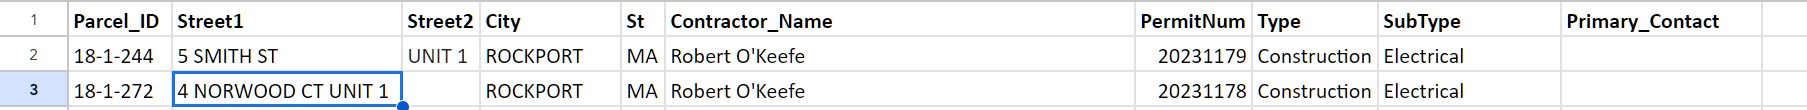

2.Removing whitespaces using Trim() function

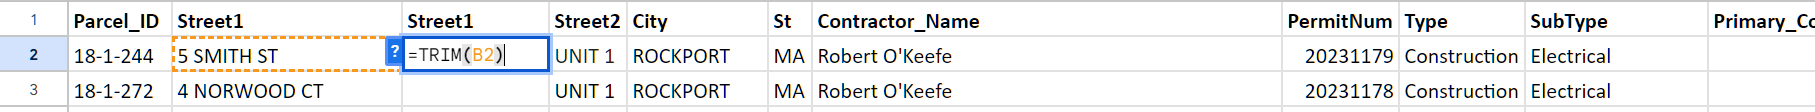

3.Using Proper() function on Column B, C and D. Column E represents state and should be Uppercase.

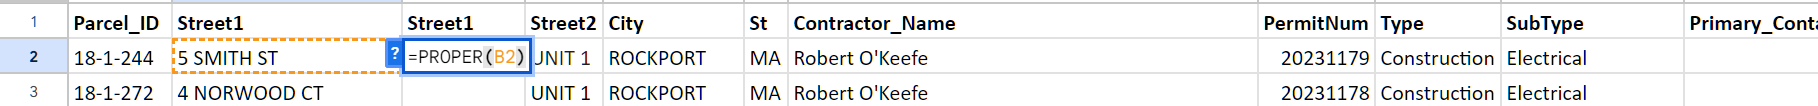

Output:

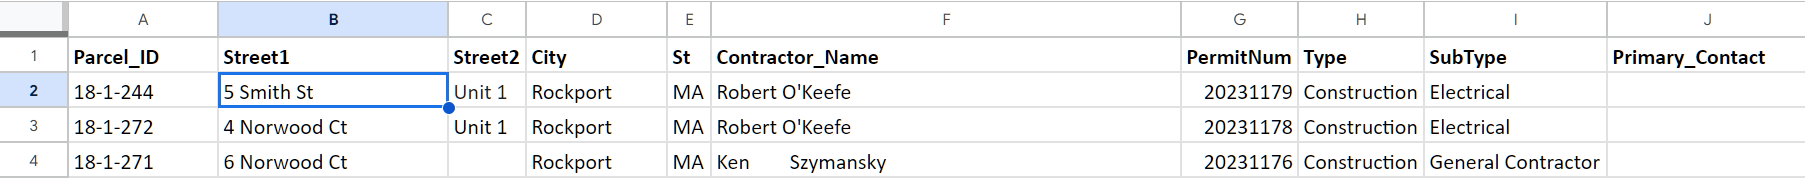

## Column F- there are iregular space in the between the names

1.Removing whitespaces using Trim() function

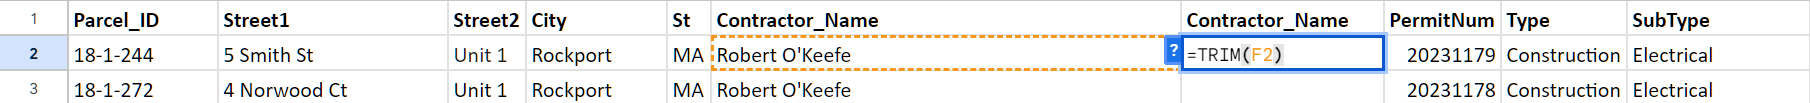

Output:

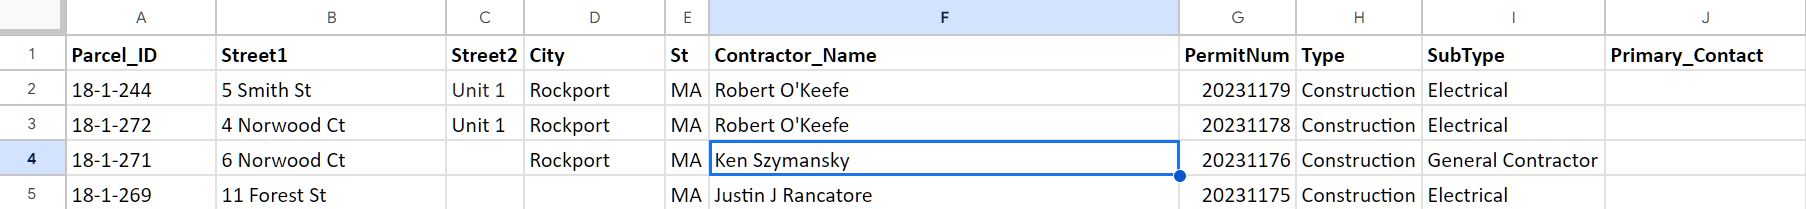



## Column H&I should be stored as id , hence create the id of your own

(Keeping it simple, 'id' is concatenation of H and I column and 'Parcel_ID' serves as unique identifier)

1.Creating new column 'id' and concatenating

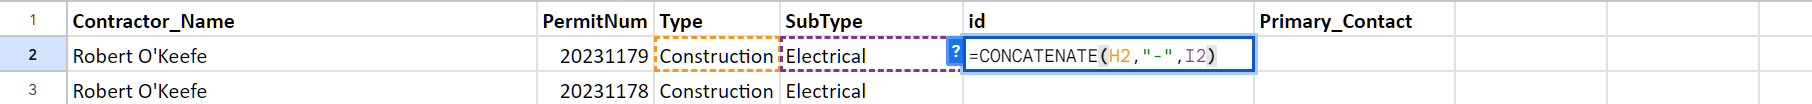

Output:

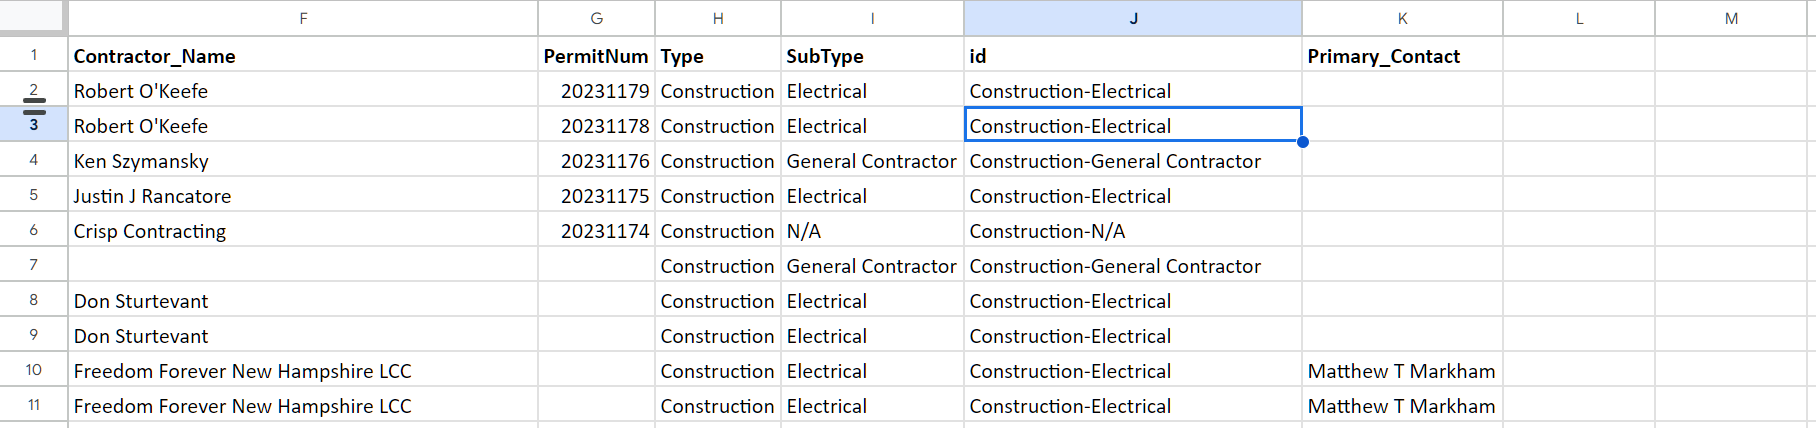


## Handling missing data

(PermitNum is unique and in descending order from the top)

1.Interploating the values for missing data

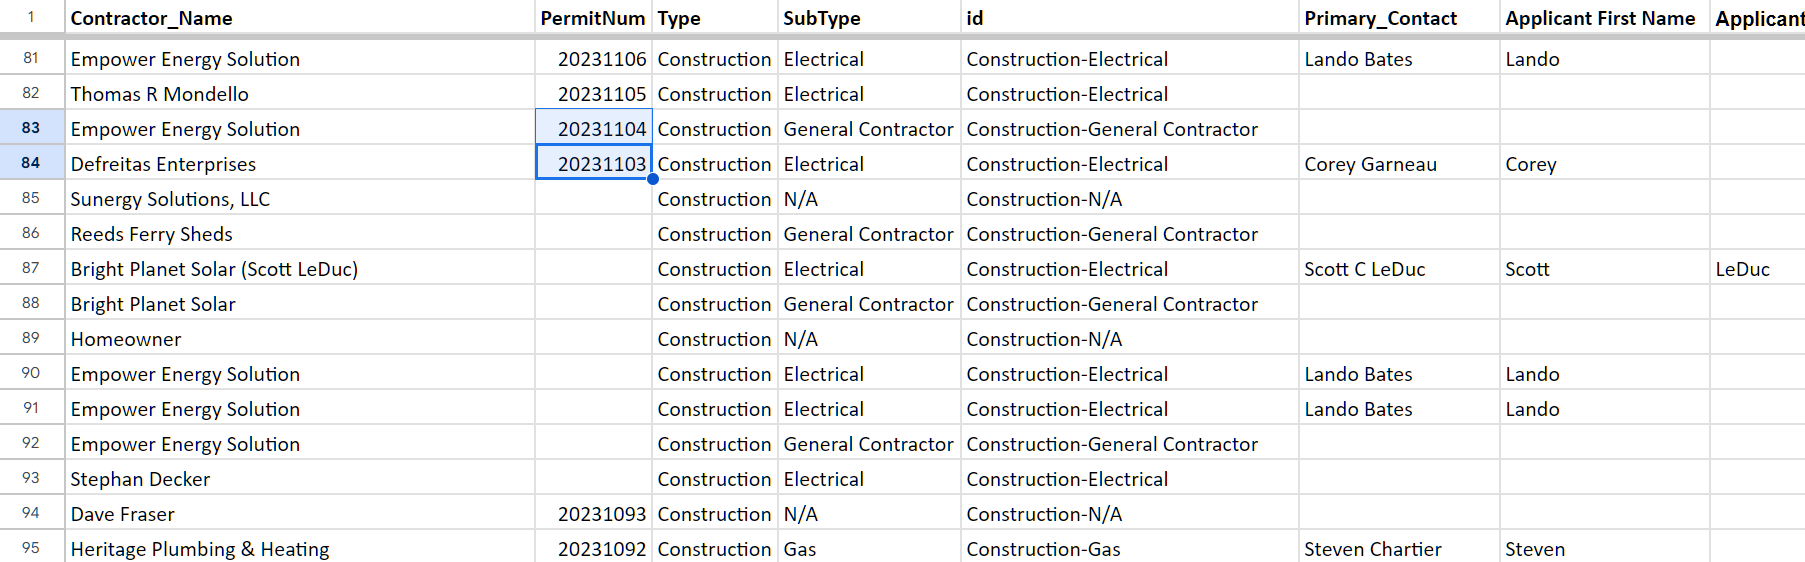

2.While interpolating for these rows, there is one extra row (Row 33 and 34 have same values except for 'Parcel_ID' and 'Street1') - Assigning same PermitNum

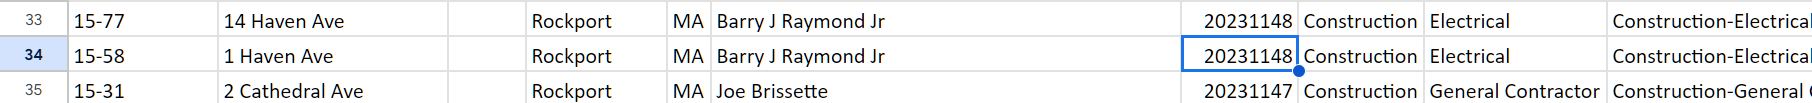

3.Correcting '4 Phillips Av' to '4 Phillips Ave'

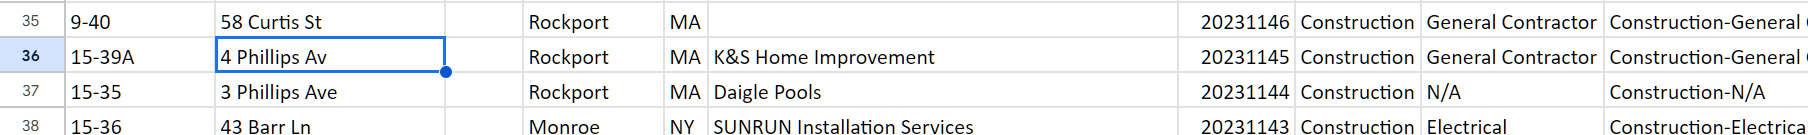

## Column J needs to be split into first name and last name

If only last name is required that can be acheived using 'split text to columns feature' of Sheets  
(Assuming last name also contain middle name)

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Brick\Desktop\Assignment_v1.csv")
df

,Parcel number,Street1,Street2,City,St,Bussiness Name,Permit,B Type Id,B Use id,id,Primary_Contact
0,18-1-244,5 Smith St,Unit 1,Rockport,MA,Robert O'Keefe,20231179,Construction,Electrical,Construction-Electrical,NaN
1,18-1-272,4 Norwood Ct,Unit 1,Rockport,MA,Robert O'Keefe,20231178,Construction,Electrical,Construction-Electrical,NaN
2,18-1-271,6 Norwood Ct,NaN,Rockport,MA,Ken Szymansky,20231176,Construction,General Contractor,Construction-General Contractor,NaN
3,18-1-269,11 Forest St,NaN,NaN,MA,Justin J Rancatore,20231175,Construction,Electrical,Construction-Electrical,NaN
4,18-7-199,7 Granite St,NaN,NaN,MA,Crisp Contracting,20231174,Construction,NaN,Construction-N/A,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94,17-43,30 Cary Ave,NaN,Lexington,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN
95,17-46,49 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN
96,17-45,60 Beach St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN
97,17-47,47 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN


In [2]:
# Spliting Primary_contact to First Name and Last Name

split = df["Primary_Contact"].str.split(" ", n = 1, expand = True)
df['Aplicant First Name'] = split[0]
df['Aplicant Last Name'] = split[1]
df[32:]

,Parcel number,Street1,Street2,City,St,Bussiness Name,Permit,B Type Id,B Use id,id,Primary_Contact,Aplicant First Name,Aplicant Last Name
32,15-58,1 Haven Ave,NaN,ROCKPORT,MA,Barry J Raymond Jr,20231148,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN
33,15-31,2 Cathedral Ave,NaN,Rockport,MA,Joe Brissette,20231147,Construction,General Contractor,Construction-General Contractor,NaN,NaN,NaN
34,9-40,58 Curtis St,NaN,Rockport,MA,NaN,20231146,Construction,General Contractor,Construction-General Contractor,NaN,NaN,NaN
35,15-39A,4 Phillips Av,NaN,Rockport,MA,K&S Home Improvement,20231145,Construction,General Contractor,Construction-General Contractor,NaN,NaN,NaN
36,15-35,3 Phillips Ave,NaN,Rockport,MA,Daigle Pools,20231144,Construction,NaN,Construction-N/A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17-43,30 Cary Ave,NaN,Lexington,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN
95,17-46,49 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN
96,17-45,60 Beach St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN
97,17-47,47 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN


In [3]:
# Adding location column
import numpy as np
df['Location'] = df[['Street1','Street2','City','St']].astype(str).agg(', '.join, axis=1)
df['Location'] = df['Location'].str.replace('nan, ','')
df['Location'] = df['Location'].replace('nan',np.nan)
df[22:]

,Parcel number,Street1,Street2,City,St,Bussiness Name,Permit,B Type Id,B Use id,id,Primary_Contact,Aplicant First Name,Aplicant Last Name,Location
22,15-99,56 Oak St,NaN,Waltham,MA,Generator Supercenter of NH,20231157,Construction,Electrical,Construction-Electrical,John Fearon,John,Fearon,"56 Oak St, Waltham, MA"
23,15-138A,NaN,NaN,NaN,NaN,Generator Supercenter of NH,20231157,Construction,Electrical,Construction-Electrical,John Fearon,John,Fearon,NaN
24,1-9B,NaN,NaN,NaN,NaN,Jusczak Electric,20231156,Construction,Electrical,Construction-Electrical,Brandon Jusczak,Brandon,Jusczak,NaN
25,1-11A,NaN,NaN,NaN,NaN,NaN,20231154,Construction,General Contractor,Construction-General Contractor,NaN,NaN,NaN,NaN
26,1-17,NaN,NaN,NaN,NaN,Jusczak Electric,20231153,Construction,Electrical,Construction-Electrical,Brandon Jusczak,Brandon,Jusczak,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,17-43,30 Cary Ave,NaN,Lexington,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN,"30 Cary Ave, Lexington, MA"
95,17-46,49 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231091,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN,"49 Granite St, Rockport, MA"
96,17-45,60 Beach St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN,"60 Beach St, Rockport, MA"
97,17-47,47 Granite St,NaN,Rockport,MA,Heritage Plumbing & Heating,20231090,Construction,Electrical,Construction-Electrical,NaN,NaN,NaN,"47 Granite St, Rockport, MA"


## Figure if any pattern exists between Column G and remaning columns

In [4]:
import seaborn as sns
correlation_matrix = df.astype(str).apply(lambda x: x.factorize()[0]).corr(method='pearson')
correlation_matrix

,Parcel number,Street1,Street2,City,St,Bussiness Name,Permit,B Type Id,B Use id,id,Primary_Contact,Aplicant First Name,Aplicant Last Name,Location
Parcel number,1.000000,0.803838,2.884715e-01,0.008853,9.835528e-03,0.728877,0.999785,NaN,-1.019392e-02,-1.019392e-02,0.370629,0.356643,0.370629,0.818946
Street1,0.803838,1.000000,2.865383e-01,0.061802,-3.722888e-01,0.562722,0.803372,NaN,7.952304e-02,7.952304e-02,0.271162,0.247177,0.271162,0.979465
Street2,0.288472,0.286538,1.000000e+00,0.266156,3.962649e-17,0.265497,0.290502,NaN,6.130648e-17,6.130648e-17,0.196641,0.209722,0.196641,0.285477
City,0.008853,0.061802,2.661564e-01,1.000000,8.529486e-02,0.085816,0.012690,NaN,-1.218642e-01,-1.218642e-01,0.149530,0.149953,0.149530,0.052461
St,0.009836,-0.372289,3.962649e-17,0.085295,1.000000e+00,0.084199,0.009923,NaN,-2.247917e-01,-2.247917e-01,0.176511,0.200606,0.176511,-0.380593
Bussiness Name,0.728877,0.562722,2.654974e-01,0.085816,8.419930e-02,1.000000,0.730224,NaN,1.658644e-01,1.658644e-01,0.439789,0.428791,0.439789,0.549869
Permit,0.999785,0.803372,2.905024e-01,0.012690,9.922815e-03,0.730224,1.000000,NaN,-1.199012e-02,-1.199012e-02,0.368364,0.353725,0.368364,0.818371
B Type Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B Use id,-0.010194,0.079523,6.130648e-17,-0.121864,-2.247917e-01,0.165864,-0.011990,NaN,1.000000e+00,1.000000e+00,0.204547,0.191814,0.204547,0.076594
id,-0.010194,0.079523,6.130648e-17,-0.121864,-2.247917e-01,0.165864,-0.011990,NaN,1.000000e+00,1.000000e+00,0.204547,0.191814,0.204547,0.076594


<Axes: >

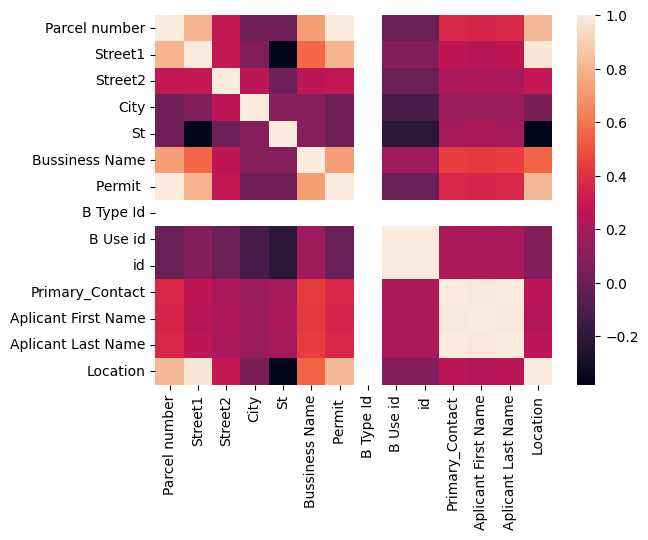

In [5]:
sns.heatmap(correlation_matrix)

### Column G i.e 'Permit' has high correlation with Location

(Same permit number are assigned for nearby locations)

## The cells which are missing data need to be notified to the customer, figure out a way to give insight to the about missing data

Other missing data can't be filled are left as NaN

In [6]:
# Insight about missing data

df.isnull().sum()

Parcel number           0
Street1                17
Street2                94
City                   18
St                     16
Bussiness Name         11
Permit                  0
B Type Id               0
B Use id                6
id                      0
Primary_Contact        56
Aplicant First Name    56
Aplicant Last Name     56
Location               16
dtype: int64

<Axes: >

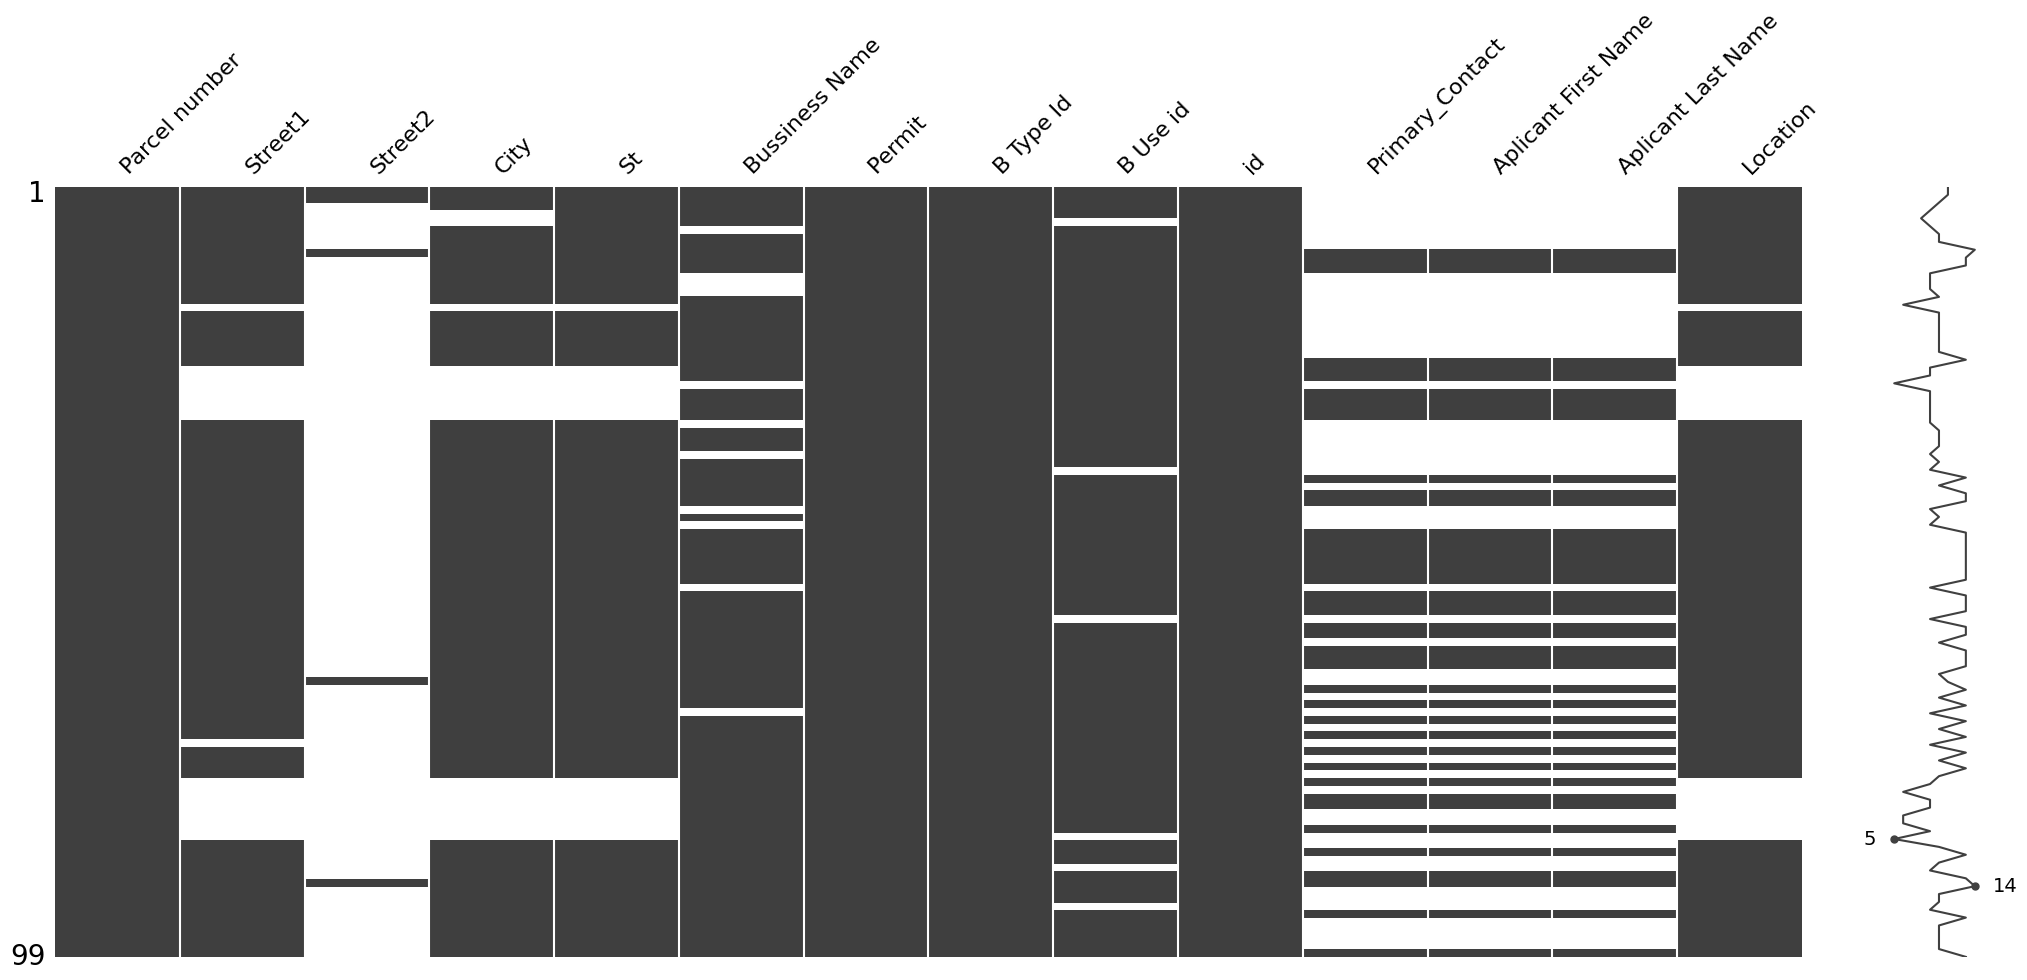

In [7]:
import missingno as msno
msno.matrix(df)

<Axes: >

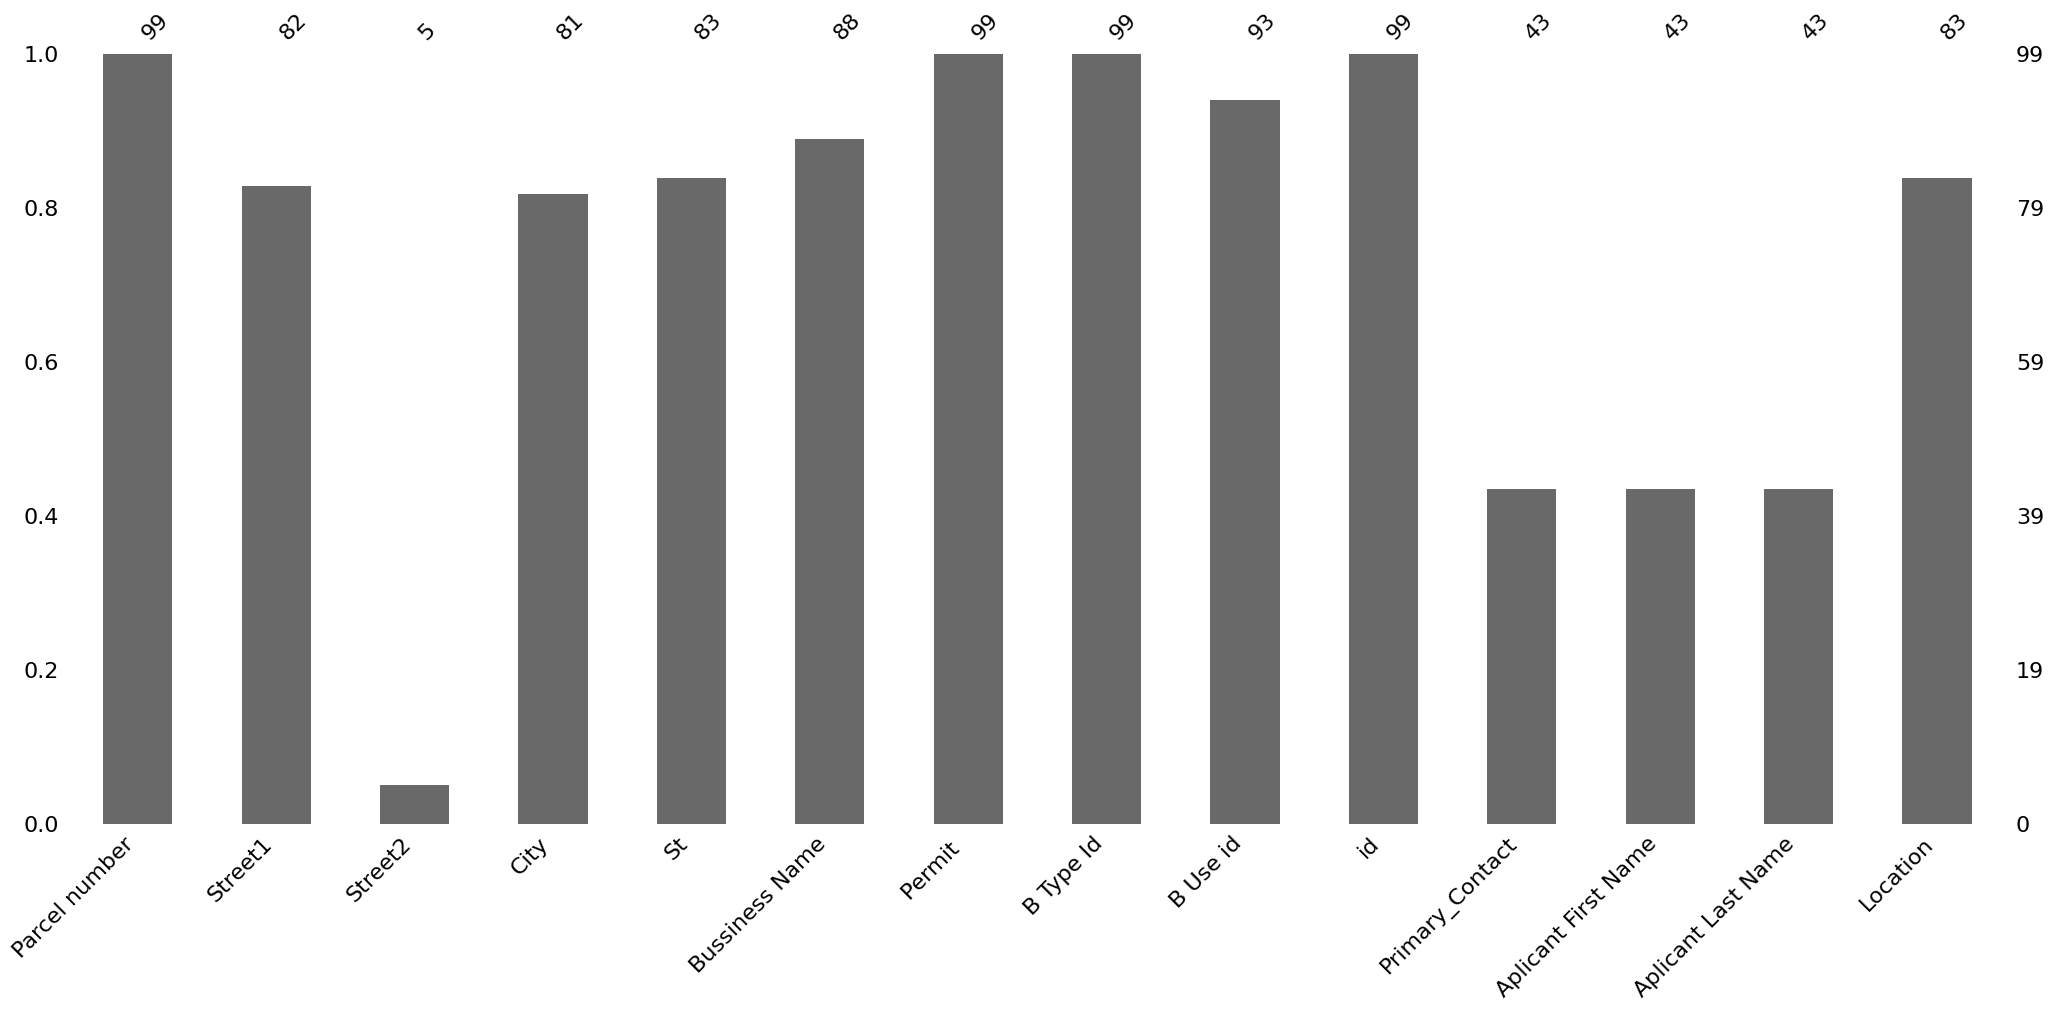

In [8]:
msno.bar(df)

In [9]:
# Exporting to csv

df.to_csv('python_output.csv')

## Arranging column to meet target columns in Sheets

Output:

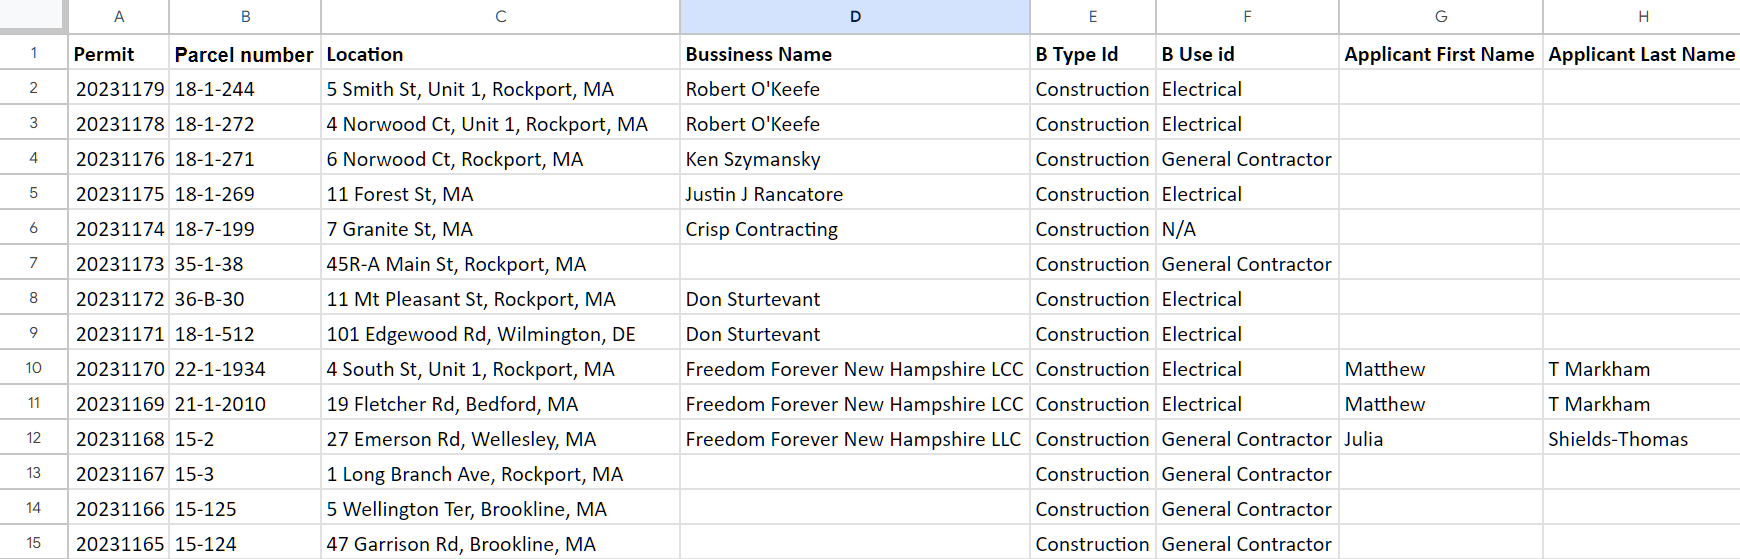

(Assuming we want unique 'B Type id' and 'B Use id')  
1.Concatinating with 'Permit' column

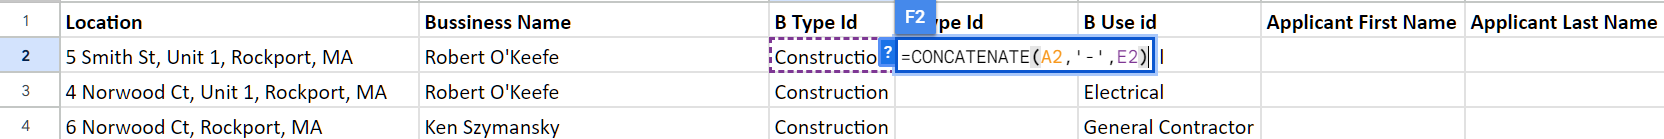

Output:

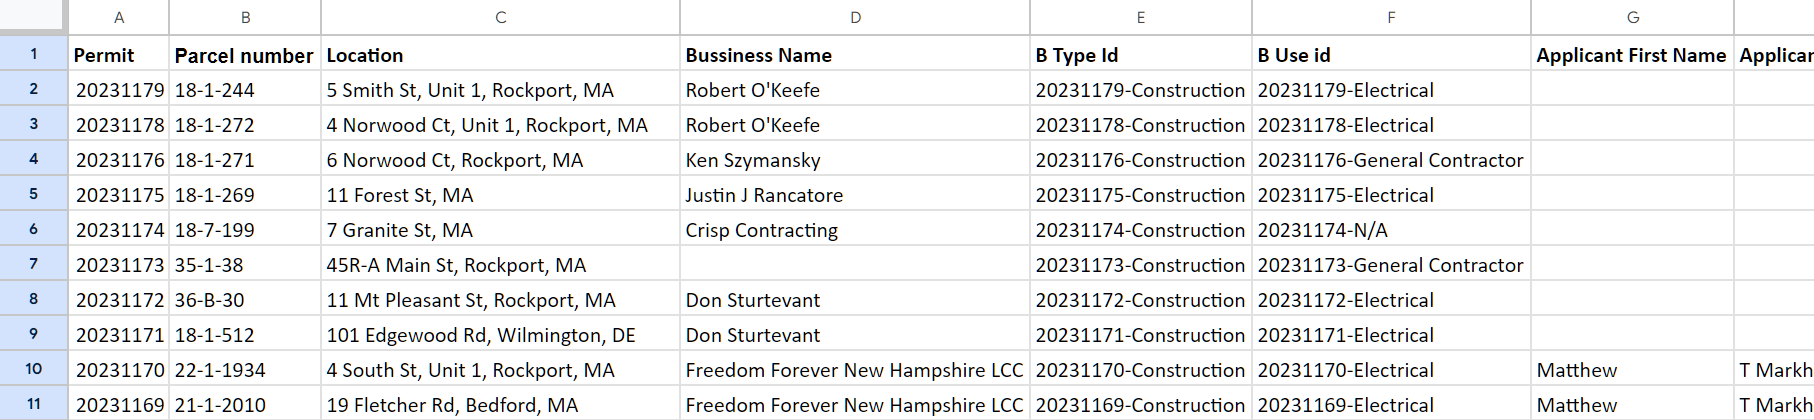

(Keeping it simple, 'id' is concatenation of H and I column as 'Parcel number' serves as unique identifier)

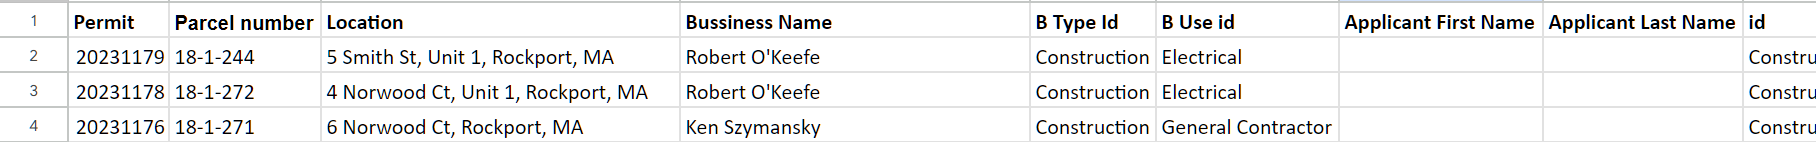

#### Assuming taget database accepts null values, data can be loaded.

## Further handling missing data for model development

In [10]:
df = pd.read_csv(r"C:\Users\Brick\Desktop\Assignment _v2.csv")
df

,Permit,Parcel number,Street1,City,St,Bussiness Name,B Type Id,B Use id,Applicant First Name,Applicant Last Name,id
0,20231179,18-1-244,5 Smith St,Rockport,MA,Robert O'Keefe,Construction,Electrical,NaN,NaN,Construction-Electrical
1,20231178,18-1-272,4 Norwood Ct,Rockport,MA,Robert O'Keefe,Construction,Electrical,NaN,NaN,Construction-Electrical
2,20231176,18-1-271,6 Norwood Ct,Rockport,MA,Ken Szymansky,Construction,General Contractor,NaN,NaN,Construction-General Contractor
3,20231175,18-1-269,11 Forest St,NaN,MA,Justin J Rancatore,Construction,Electrical,NaN,NaN,Construction-Electrical
4,20231174,18-7-199,7 Granite St,NaN,MA,Crisp Contracting,Construction,NaN,NaN,NaN,Construction-N/A
...,...,...,...,...,...,...,...,...,...,...,...
94,20231091,17-43,30 Cary Ave,Lexington,MA,Heritage Plumbing & Heating,Construction,Electrical,NaN,NaN,Construction-Electrical
95,20231091,17-46,49 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,NaN,NaN,Construction-Electrical
96,20231090,17-45,60 Beach St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,NaN,NaN,Construction-Electrical
97,20231090,17-47,47 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,NaN,NaN,Construction-Electrical


In [11]:
df.isnull().sum()

Permit                   0
Parcel number            0
Street1                 17
City                    18
St                      16
Bussiness Name          11
B Type Id                0
B Use id                 6
Applicant First Name    56
Applicant Last Name     56
id                       0
dtype: int64

### Dropping columns

'Applicant First Name' and 'Applicant Last Name' column are Missing Completely at Random (MCAR). Assuming ther will be no significant effect on model, dropping these columns and 'id' column

In [12]:
df = df.drop(['Applicant First Name','Applicant Last Name','id'], axis = 1)
df

,Permit,Parcel number,Street1,City,St,Bussiness Name,B Type Id,B Use id
0,20231179,18-1-244,5 Smith St,Rockport,MA,Robert O'Keefe,Construction,Electrical
1,20231178,18-1-272,4 Norwood Ct,Rockport,MA,Robert O'Keefe,Construction,Electrical
2,20231176,18-1-271,6 Norwood Ct,Rockport,MA,Ken Szymansky,Construction,General Contractor
3,20231175,18-1-269,11 Forest St,NaN,MA,Justin J Rancatore,Construction,Electrical
4,20231174,18-7-199,7 Granite St,NaN,MA,Crisp Contracting,Construction,NaN
...,...,...,...,...,...,...,...,...
94,20231091,17-43,30 Cary Ave,Lexington,MA,Heritage Plumbing & Heating,Construction,Electrical
95,20231091,17-46,49 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical
96,20231090,17-45,60 Beach St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical
97,20231090,17-47,47 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical


In [13]:
df.isnull().sum()

Permit             0
Parcel number      0
Street1           17
City              18
St                16
Bussiness Name    11
B Type Id          0
B Use id           6
dtype: int64

### 'B Use id' , 'Bussiness Name', 'St' and 'City' column
Model prediction can't be used as missing data is Missing Completely at Random (MCAR)  
(Imputing the missing values with 'most frequent value')

In [14]:
df['B Use id'].value_counts()

Electrical            47
General Contractor    33
Plumbing               4
Gas                    4
Septic Designer        3
Well                   2
Name: B Use id, dtype: int64

In [15]:
df['B Use id'].fillna(df['B Use id'].mode().iloc[0], inplace = True)
df['Bussiness Name'].fillna(df['Bussiness Name'].mode().iloc[0], inplace = True)
df['St'].fillna(df['St'].mode().iloc[0], inplace = True)
df['City'].fillna(df['City'].mode().iloc[0], inplace = True)
df

,Permit,Parcel number,Street1,City,St,Bussiness Name,B Type Id,B Use id
0,20231179,18-1-244,5 Smith St,Rockport,MA,Robert O'Keefe,Construction,Electrical
1,20231178,18-1-272,4 Norwood Ct,Rockport,MA,Robert O'Keefe,Construction,Electrical
2,20231176,18-1-271,6 Norwood Ct,Rockport,MA,Ken Szymansky,Construction,General Contractor
3,20231175,18-1-269,11 Forest St,Rockport,MA,Justin J Rancatore,Construction,Electrical
4,20231174,18-7-199,7 Granite St,Rockport,MA,Crisp Contracting,Construction,Electrical
...,...,...,...,...,...,...,...,...
94,20231091,17-43,30 Cary Ave,Lexington,MA,Heritage Plumbing & Heating,Construction,Electrical
95,20231091,17-46,49 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical
96,20231090,17-45,60 Beach St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical
97,20231090,17-47,47 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical


In [16]:
df.isnull().sum()

Permit             0
Parcel number      0
Street1           17
City               0
St                 0
Bussiness Name     0
B Type Id          0
B Use id           0
dtype: int64

In [17]:
df['Location'] = df[['Street1','City','St']].astype(str).agg(', '.join, axis=1)
df['Location'] = df['Location'].str.replace('nan, ','')
df['Location'] = df['Location'].replace('nan',np.nan)
df

,Permit,Parcel number,Street1,City,St,Bussiness Name,B Type Id,B Use id,Location
0,20231179,18-1-244,5 Smith St,Rockport,MA,Robert O'Keefe,Construction,Electrical,"5 Smith St, Rockport, MA"
1,20231178,18-1-272,4 Norwood Ct,Rockport,MA,Robert O'Keefe,Construction,Electrical,"4 Norwood Ct, Rockport, MA"
2,20231176,18-1-271,6 Norwood Ct,Rockport,MA,Ken Szymansky,Construction,General Contractor,"6 Norwood Ct, Rockport, MA"
3,20231175,18-1-269,11 Forest St,Rockport,MA,Justin J Rancatore,Construction,Electrical,"11 Forest St, Rockport, MA"
4,20231174,18-7-199,7 Granite St,Rockport,MA,Crisp Contracting,Construction,Electrical,"7 Granite St, Rockport, MA"
...,...,...,...,...,...,...,...,...,...
94,20231091,17-43,30 Cary Ave,Lexington,MA,Heritage Plumbing & Heating,Construction,Electrical,"30 Cary Ave, Lexington, MA"
95,20231091,17-46,49 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,"49 Granite St, Rockport, MA"
96,20231090,17-45,60 Beach St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,"60 Beach St, Rockport, MA"
97,20231090,17-47,47 Granite St,Rockport,MA,Heritage Plumbing & Heating,Construction,Electrical,"47 Granite St, Rockport, MA"


### Dropping columns

Dropping 'Street1', 'City' and 'St' column

In [18]:
df = df.drop(['Street1','City','St'], axis = 1)
df

,Permit,Parcel number,Bussiness Name,B Type Id,B Use id,Location
0,20231179,18-1-244,Robert O'Keefe,Construction,Electrical,"5 Smith St, Rockport, MA"
1,20231178,18-1-272,Robert O'Keefe,Construction,Electrical,"4 Norwood Ct, Rockport, MA"
2,20231176,18-1-271,Ken Szymansky,Construction,General Contractor,"6 Norwood Ct, Rockport, MA"
3,20231175,18-1-269,Justin J Rancatore,Construction,Electrical,"11 Forest St, Rockport, MA"
4,20231174,18-7-199,Crisp Contracting,Construction,Electrical,"7 Granite St, Rockport, MA"
...,...,...,...,...,...,...
94,20231091,17-43,Heritage Plumbing & Heating,Construction,Electrical,"30 Cary Ave, Lexington, MA"
95,20231091,17-46,Heritage Plumbing & Heating,Construction,Electrical,"49 Granite St, Rockport, MA"
96,20231090,17-45,Heritage Plumbing & Heating,Construction,Electrical,"60 Beach St, Rockport, MA"
97,20231090,17-47,Heritage Plumbing & Heating,Construction,Electrical,"47 Granite St, Rockport, MA"


In [19]:
df.isnull().sum()

Permit            0
Parcel number     0
Bussiness Name    0
B Type Id         0
B Use id          0
Location          0
dtype: int64

In [20]:
# Exporting to csv

df.to_csv('python_output_model.csv')

## Please find the 'ETL' and 'Model' sheets in the file.